## ABOUT DATASET

- A Travel Company Is Offering Travel Insurance Packages To Their Customers. The new insurance plan also covers Covid-19. The Company Claims To Know Which Customers Are Interested To Buy It Based On The Company's Database History. 

| # | Thuộc tính | Mô tả
| --- | --- | --- 
| 1 | Age | Age Of The Customer
| 2 | Employment Type | The Sector In Which Customer Is Employed
| 3 | GraduateOrNot | Whether The Customer Is College Graduate Or Not
| 4 | AnnualIncome | The Yearly Income Of The Customer In Indian Rupees
| 5 | FamilyMembers | Number Of Members In Customer's Family
| 6 | ChronicDisease | Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc
| 7 | FrequentFlyer | Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years (2017-2019)
| 8 | EverTravelledAbroad | Has The Customer Ever Travelled To A Foreign Country
| 9 | TravelInsurance |  Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019

## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
PATH = "D:\\NMMH\\TravelInsurancePrediction.csv" # Path to your file

df = pd.read_csv(PATH)
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [4]:
df = df.drop(["Unnamed: 0"], axis = 1)
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [5]:
df["ChronicDiseases"].replace([0,1],['No','Yes'], inplace = True)
df["TravelInsurance"].replace([0,1],['not purchased','purchased'],inplace = True)
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,Yes,No,No,not purchased
1,31,Private Sector/Self Employed,Yes,1250000,7,No,No,No,not purchased
2,34,Private Sector/Self Employed,Yes,500000,4,Yes,No,No,purchased
3,28,Private Sector/Self Employed,Yes,700000,3,Yes,No,No,not purchased
4,28,Private Sector/Self Employed,Yes,700000,8,Yes,Yes,No,not purchased


In [6]:
# Get categorical columns and numerical columns
categorical_cols = [feature for feature in df.columns if df[feature].dtype == "object"]
numerical_cols = [feature for feature in df.columns if df[feature].dtype != "object"]
print(categorical_cols)
print(numerical_cols)

['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']
['Age', 'AnnualIncome', 'FamilyMembers']


In [7]:
df.describe()

,Age,AnnualIncome,FamilyMembers
count,1987.000000,1.987000e+03,1987.000000
mean,29.650226,9.327630e+05,4.752894
std,2.913308,3.768557e+05,1.609650
min,25.000000,3.000000e+05,2.000000
25%,28.000000,6.000000e+05,4.000000
50%,29.000000,9.000000e+05,5.000000
75%,32.000000,1.250000e+06,6.000000
max,35.000000,1.800000e+06,9.000000


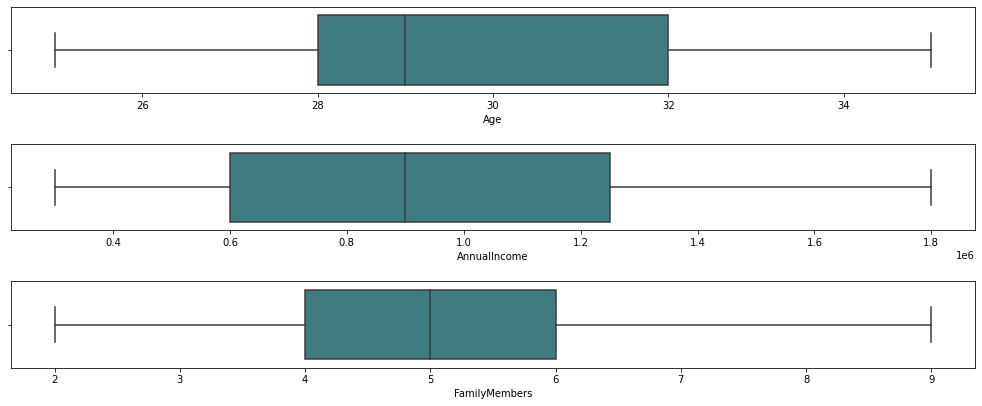

In [8]:
fig, axes=plt.subplots(len(numerical_cols), 1, figsize=(14, 2*len(numerical_cols)),sharex=False,sharey=False)

for i, column in enumerate(numerical_cols):
    sns.boxplot(x=column,data=df,palette='crest',ax=axes[i])
plt.tight_layout(pad=2.0)

- Dựa vào biểu đồ boxplot dễ thấy không có điểm outlier


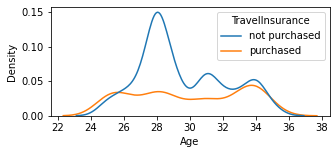

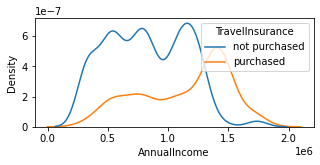

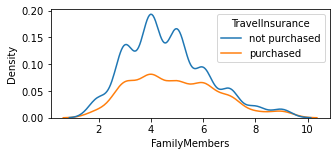

In [9]:
for feature in numerical_cols :
  fig, ax = plt.subplots(figsize=(5,2))
  sns.kdeplot(data=df, hue= 'TravelInsurance', x=feature, ax=ax)
  plt.show()

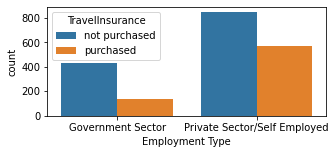

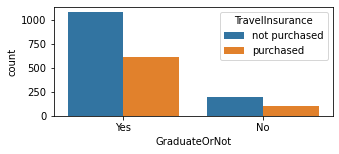

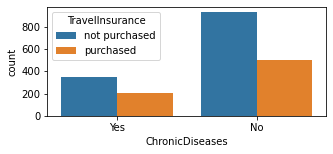

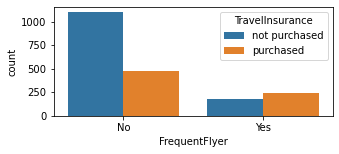

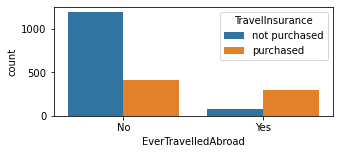

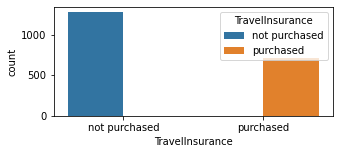

In [10]:
target = 'TravelInsurance'
for feature in categorical_cols:
    fig, ax = plt.subplots(figsize=(5,2))
    sns.countplot(x=feature, hue=target, data=df, ax=ax)
    plt.show()

## Preprocessing

In [11]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df = df
    return df

In [12]:
df = preprocessing_data(df.copy())

## Feature Engineering

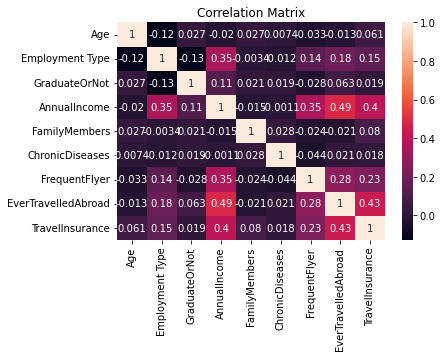

In [13]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    for feature in df.columns:
        if df[feature].dtype == "object":
            df[feature] = df[feature].astype('category').cat.codes
        
    return df

df = apply_feature_engineering(df)
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()# Show heatmap after normalized data

In [14]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop(['TravelInsurance'], axis=1) # Todo: Select features
    y = df['TravelInsurance']# Todo: Select label
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [15]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 1
TRAIN_SIZE = 0.8

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

In [16]:
trainX.shape,testX.shape

((1589, 8), (398, 8))

## Build SK-learn model

In [17]:
# --- Without Scaler
from sklearn.naive_bayes import GaussianNB

# Model training
naive_model = GaussianNB()
naive_model.fit(trainX, trainY.ravel())

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = naive_model.predict(testX)
print(classification_report(testY, predicted_label))


              precision    recall  f1-score   support

           0       0.78      0.90      0.83       253
           1       0.76      0.54      0.63       145

    accuracy                           0.77       398
   macro avg       0.77      0.72      0.73       398
weighted avg       0.77      0.77      0.76       398



In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB

# Scaler
normalizer = MinMaxScaler()
X_normal_train = normalizer.fit_transform(trainX)
X_normal_test = normalizer.transform(testX)

# Model training
naive_model = GaussianNB()
naive_model.fit(X_normal_train, trainY.ravel())

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = naive_model.predict(X_normal_test)
print(classification_report(testY, predicted_label))


              precision    recall  f1-score   support

           0       0.77      0.91      0.83       253
           1       0.76      0.54      0.63       145

    accuracy                           0.77       398
   macro avg       0.77      0.72      0.73       398
weighted avg       0.77      0.77      0.76       398



## GaussianNB

In [19]:
# -- Build a full pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
# Define a Standard Scaler to normalize inputs
scaler = MinMaxScaler()

# set the tolerance to a large value to make the example faster
gau_nb = GaussianNB()
pipe = Pipeline(steps=[("scaler", scaler),('pca',PCA()), ("gau_nb", gau_nb)]) #Build a pipeline with a scaler and a model

# Parameters of pipelines can be set using '__' separated parameter names:
var_smoothing_values = np.logspace(-4, -9, num=100)
param_grid = {
    "scaler__feature_range": [(-1, 1), (0, 1)],
    'gau_nb__var_smoothing': var_smoothing_values,
    "pca__n_components": [1,2,3,4,5]
    }

search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(trainX, trainY)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

predicted_label = search.predict(testX)
print(classification_report(testY, predicted_label))

Best parameter (CV score=0.760):
{'gau_nb__var_smoothing': 0.0001, 'pca__n_components': 5, 'scaler__feature_range': (-1, 1)}
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       253
           1       0.85      0.50      0.63       145

    accuracy                           0.79       398
   macro avg       0.81      0.73      0.74       398
weighted avg       0.80      0.79      0.77       398



## BernoulliNB

In [20]:
# Define a Standard Scaler to normalize inputs
scaler = MinMaxScaler()

# set the tolerance to a large value to make the example faster
bn_nb = BernoulliNB()
pipe = Pipeline(steps=[("scaler", scaler),("pca",PCA()), ("bn_nb", bn_nb)]) #Build a pipeline with a scaler and a model

# Parameters of pipelines can be set using '__' separated parameter names:
var_smoothing_values = np.logspace(-4, -9, num=100)
param_grid = {
    "scaler__feature_range": [(-1, 1), (0, 1)],
    'bn_nb__alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
    'bn_nb__binarize': [0.0, 0.5, 1.0],
    "pca__n_components": [1,2,3,4,5]
    }

search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(trainX, trainY)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

predicted_label = search.predict(testX)
print(classification_report(testY, predicted_label))

Best parameter (CV score=0.748):
{'bn_nb__alpha': 0.1, 'bn_nb__binarize': 0.5, 'pca__n_components': 1, 'scaler__feature_range': (0, 1)}
              precision    recall  f1-score   support

           0       0.76      0.95      0.85       253
           1       0.85      0.48      0.61       145

    accuracy                           0.78       398
   macro avg       0.81      0.71      0.73       398
weighted avg       0.79      0.78      0.76       398



Sau khi kiểm thử 2 model, model được chọn GaussianNB vì tổng quan các chỉ số đều có vẻ khả quan hơn so với BernoulliNB

In [21]:
# Model duoc chon la 
def build_model(X, y):
    scaler = MinMaxScaler()

    # set the tolerance to a large value to make the example faster
    gau_nb = GaussianNB()
    pipe = Pipeline(steps=[("scaler", scaler),('pca',PCA()), ("gau_nb", gau_nb)]) #Build a pipeline with a scaler and a model

    # Parameters of pipelines can be set using '__' separated parameter names:
    var_smoothing_values = np.logspace(-4, -9, num=100)
    param_grid = {
        "scaler__feature_range": [(-1, 1), (0, 1)],
        'gau_nb__var_smoothing': var_smoothing_values,
        "pca__n_components": [1,2,3,4,5]
        }

    search = GridSearchCV(pipe, param_grid, n_jobs=2)
    search.fit(trainX, trainY)
    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)
    return search

def calculate_performance(y_true, y_pred):
    """
    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    main_score = classification_report(y_true,y_pred,output_dict=True)["1"]["f1-score"]
    return main_score

naive_model = build_model(X, y)

predicted_label = naive_model.predict(testX)
print(classification_report(testY, predicted_label))
print("main-score: ", calculate_performance(testY, predicted_label))

Best parameter (CV score=0.760):
{'gau_nb__var_smoothing': 0.0001, 'pca__n_components': 5, 'scaler__feature_range': (-1, 1)}
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       253
           1       0.85      0.50      0.63       145

    accuracy                           0.79       398
   macro avg       0.81      0.73      0.74       398
weighted avg       0.80      0.79      0.77       398

main-score:  0.632034632034632


In [22]:
def get_conclusion():
    return "7. Main-score là F1-score vì ta muốn tập trung tối ưu cả về chính xác và độ phủ và ta muốn tập trung chủ yếu vào giá trị 1 (mua) "\
           "Model được sử dụng là GaussianNB vì có chỉ số F1-score nhỉnh hơn so với BernoulliNB, với params là var_smoothing là 0.0001,dimension reduction PCA có n_components là 5, scaler sử dụng là min-max scaler với feature_range là (-1,1)"

In [23]:
conclusion = get_conclusion()
print(conclusion)

7. Main-score là F1-score vì ta muốn tập trung tối ưu cả về chính xác và độ phủ và ta muốn tập trung chủ yếu vào giá trị 1 (mua) Model được sử dụng là GaussianNB vì có chỉ số F1-score nhỉnh hơn so với BernoulliNB, với params là var_smoothing là 0.0001,dimension reduction PCA có n_components là 5, scaler sử dụng là min-max scaler với feature_range là (-1,1)
